In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
def build_model():
    model = Sequential([
        Input(shape=(512, 1)),
        Bidirectional(LSTM(64, return_sequences=True)),
        BatchNormalization(),
        Dropout(0.5),

        Bidirectional(LSTM(64, return_sequences=True)),
        BatchNormalization(),
        Dropout(0.5),

        Bidirectional(LSTM(32)),
        Dropout(0.5),

        Dense(32, activation='relu'),
        Dropout(0.4),

        Dense(2, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=5e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [3]:
# --- 1. Plot Accuracy ---
def plot_accuracy(history):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- 2. Plot Loss ---
def plot_loss(history):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- 3. Confusion Matrix ---
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test, verbose=0)
    y_true = np.argmax(y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred_labels)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=['No QPO', 'QPO'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    return y_true, y_pred

# --- 4. ROC Curve  ---
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


🚀 Training on amplitude: 0.0
Epoch 1/50
32/32 - 31s - 981ms/step - accuracy: 0.5000 - loss: 0.7541 - val_accuracy: 0.4950 - val_loss: 0.6935 - learning_rate: 5.0000e-04
Epoch 2/50
32/32 - 29s - 909ms/step - accuracy: 0.5170 - loss: 0.7303 - val_accuracy: 0.4800 - val_loss: 0.6935 - learning_rate: 5.0000e-04
Epoch 3/50
32/32 - 30s - 926ms/step - accuracy: 0.4963 - loss: 0.7213 - val_accuracy: 0.4820 - val_loss: 0.6938 - learning_rate: 5.0000e-04
Epoch 4/50
32/32 - 35s - 1s/step - accuracy: 0.5090 - loss: 0.7041 - val_accuracy: 0.4780 - val_loss: 0.6938 - learning_rate: 2.5000e-04
Epoch 5/50
32/32 - 33s - 1s/step - accuracy: 0.5027 - loss: 0.7085 - val_accuracy: 0.4790 - val_loss: 0.6937 - learning_rate: 2.5000e-04
Epoch 6/50
32/32 - 34s - 1s/step - accuracy: 0.5002 - loss: 0.7100 - val_accuracy: 0.4810 - val_loss: 0.6938 - learning_rate: 1.2500e-04


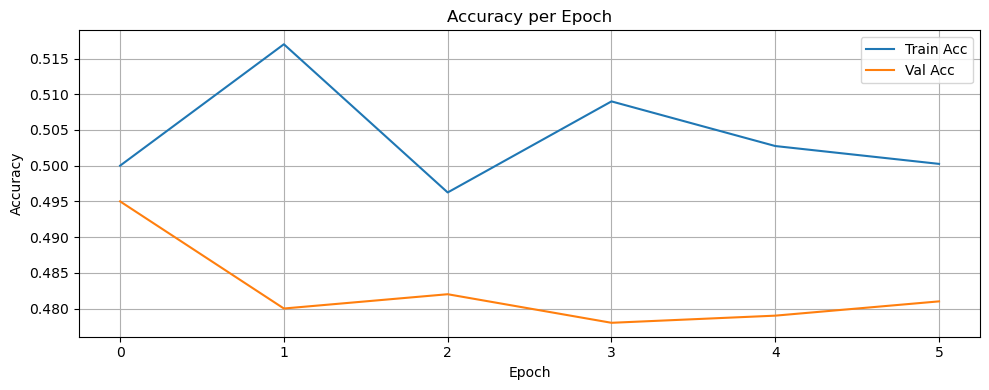

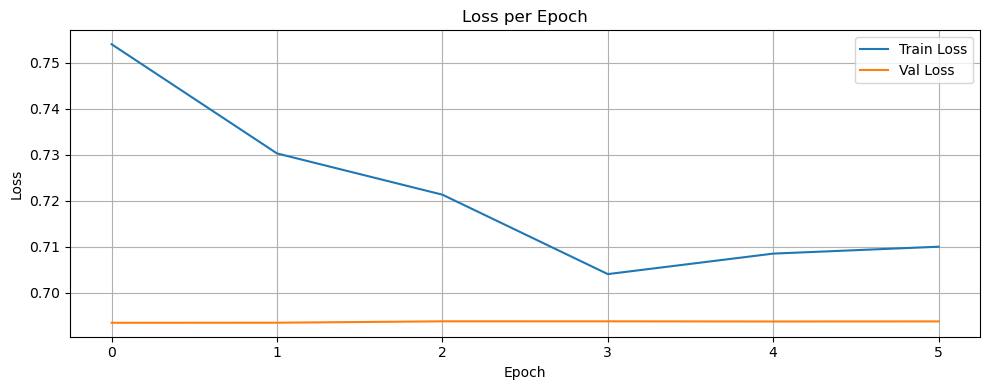

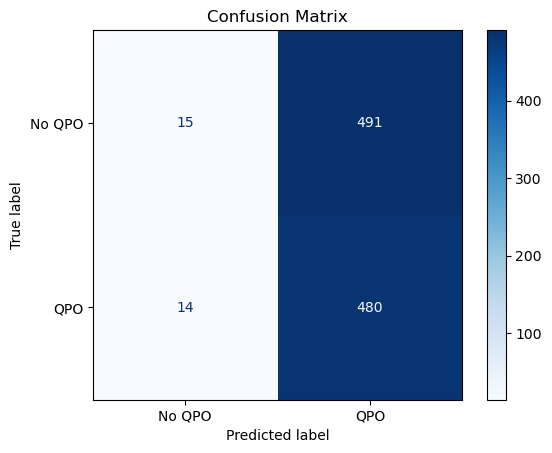

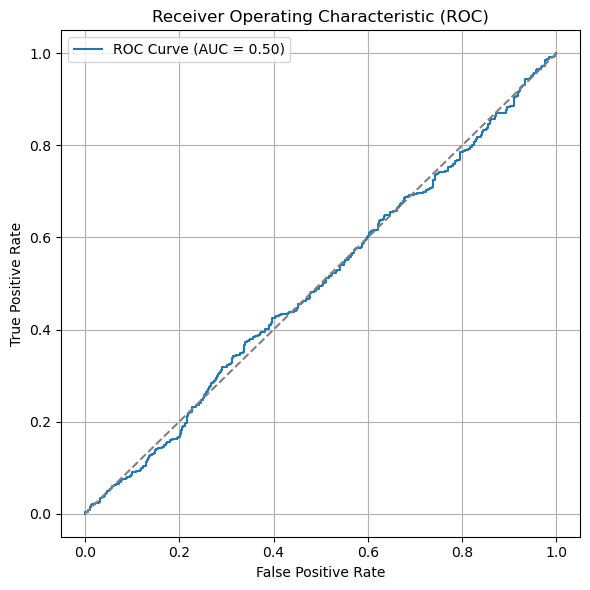

✅ Amplitude 0.0: Best Val Accuracy = 0.4950

🚀 Training on amplitude: 0.2
Epoch 1/50
32/32 - 29s - 916ms/step - accuracy: 0.5217 - loss: 0.7175 - val_accuracy: 0.5640 - val_loss: 0.6914 - learning_rate: 5.0000e-04
Epoch 2/50
32/32 - 29s - 897ms/step - accuracy: 0.5290 - loss: 0.7031 - val_accuracy: 0.5660 - val_loss: 0.6905 - learning_rate: 5.0000e-04
Epoch 3/50
32/32 - 27s - 853ms/step - accuracy: 0.5332 - loss: 0.6981 - val_accuracy: 0.5800 - val_loss: 0.6900 - learning_rate: 5.0000e-04
Epoch 4/50
32/32 - 32s - 1s/step - accuracy: 0.5310 - loss: 0.6936 - val_accuracy: 0.5660 - val_loss: 0.6891 - learning_rate: 5.0000e-04
Epoch 5/50
32/32 - 32s - 1s/step - accuracy: 0.5472 - loss: 0.6895 - val_accuracy: 0.5770 - val_loss: 0.6877 - learning_rate: 5.0000e-04
Epoch 6/50
32/32 - 30s - 947ms/step - accuracy: 0.5502 - loss: 0.6862 - val_accuracy: 0.5820 - val_loss: 0.6858 - learning_rate: 5.0000e-04
Epoch 7/50
32/32 - 30s - 950ms/step - accuracy: 0.5560 - loss: 0.6809 - val_accuracy: 0.5840

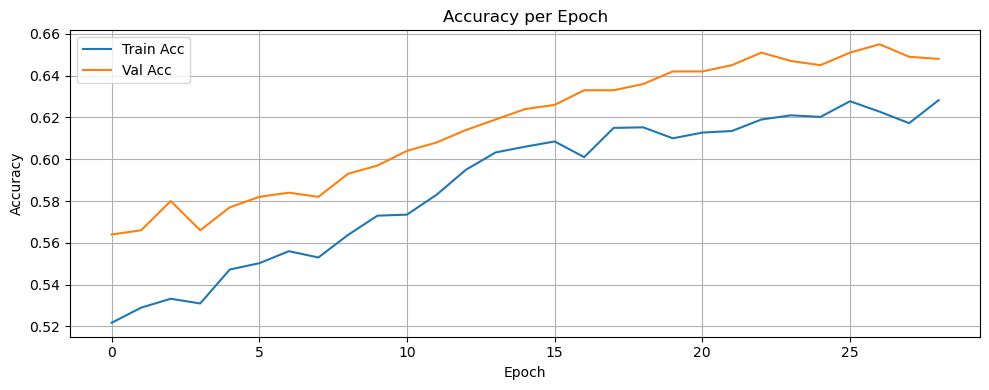

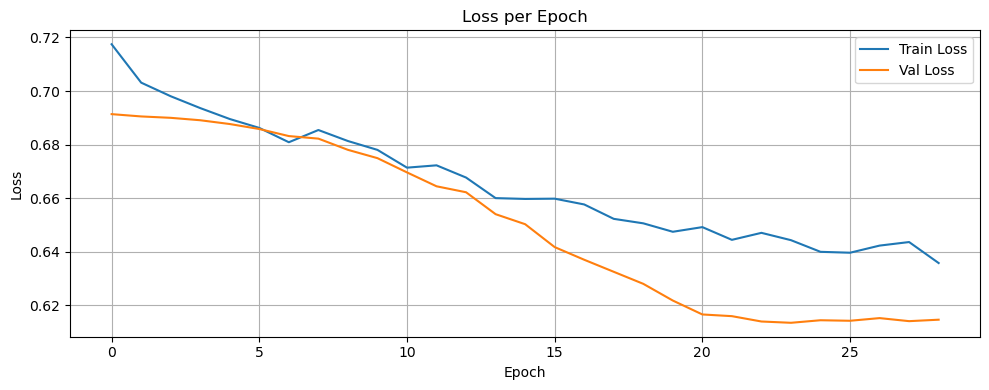

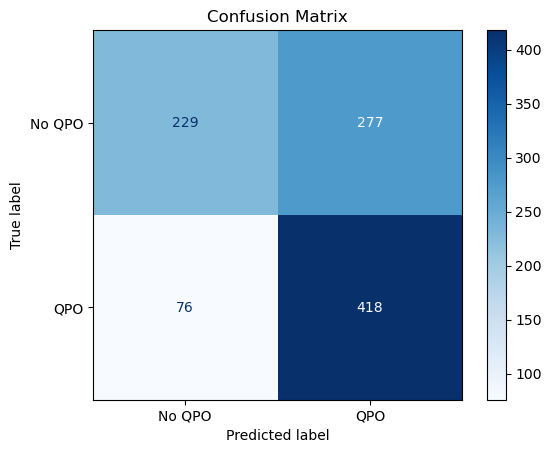

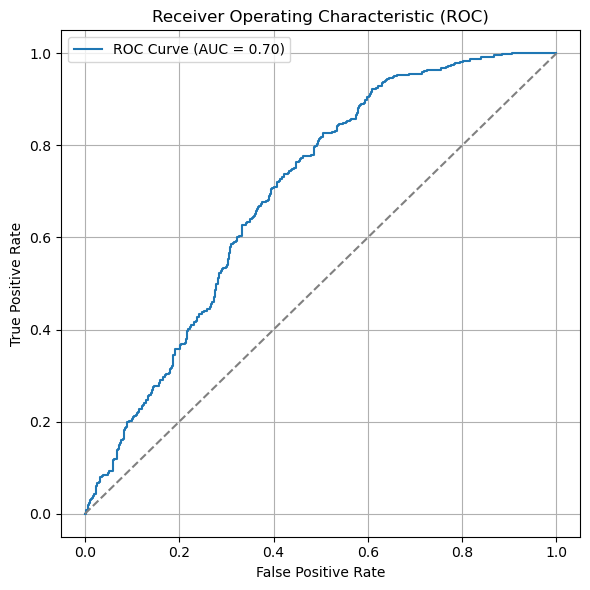

✅ Amplitude 0.2: Best Val Accuracy = 0.6550

🚀 Training on amplitude: 0.4
Epoch 1/50
32/32 - 28s - 861ms/step - accuracy: 0.5353 - loss: 0.7100 - val_accuracy: 0.5260 - val_loss: 0.6911 - learning_rate: 5.0000e-04
Epoch 2/50
32/32 - 25s - 772ms/step - accuracy: 0.5675 - loss: 0.6800 - val_accuracy: 0.5660 - val_loss: 0.6887 - learning_rate: 5.0000e-04
Epoch 3/50
32/32 - 25s - 784ms/step - accuracy: 0.6152 - loss: 0.6594 - val_accuracy: 0.5850 - val_loss: 0.6835 - learning_rate: 5.0000e-04
Epoch 4/50
32/32 - 28s - 883ms/step - accuracy: 0.6323 - loss: 0.6477 - val_accuracy: 0.5980 - val_loss: 0.6755 - learning_rate: 5.0000e-04
Epoch 5/50
32/32 - 28s - 876ms/step - accuracy: 0.6572 - loss: 0.6243 - val_accuracy: 0.6180 - val_loss: 0.6636 - learning_rate: 5.0000e-04
Epoch 6/50
32/32 - 28s - 879ms/step - accuracy: 0.6705 - loss: 0.6115 - val_accuracy: 0.6250 - val_loss: 0.6494 - learning_rate: 5.0000e-04
Epoch 7/50
32/32 - 28s - 872ms/step - accuracy: 0.6938 - loss: 0.5903 - val_accuracy: 

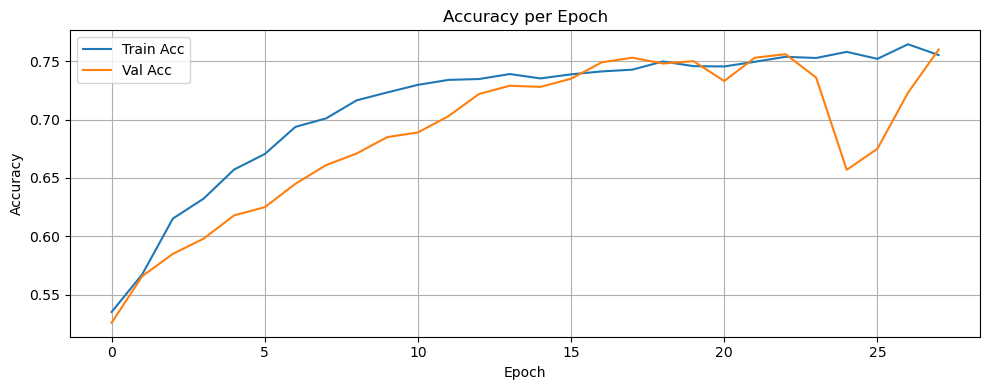

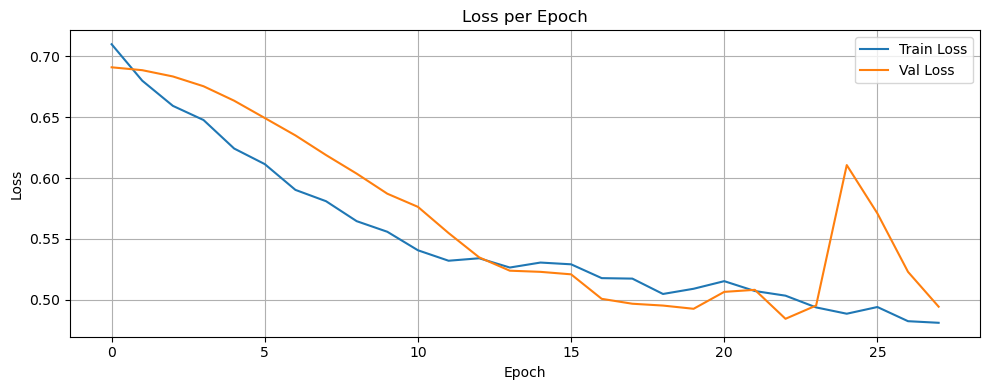

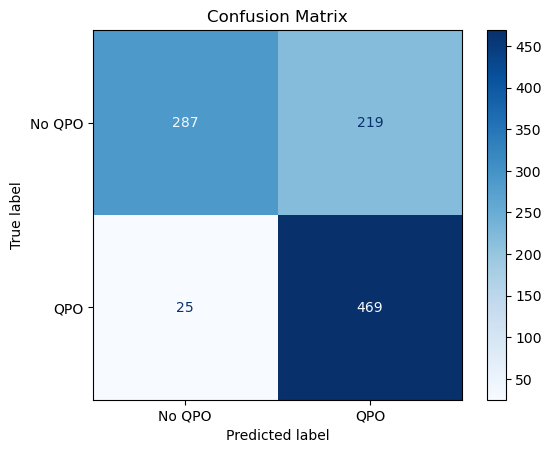

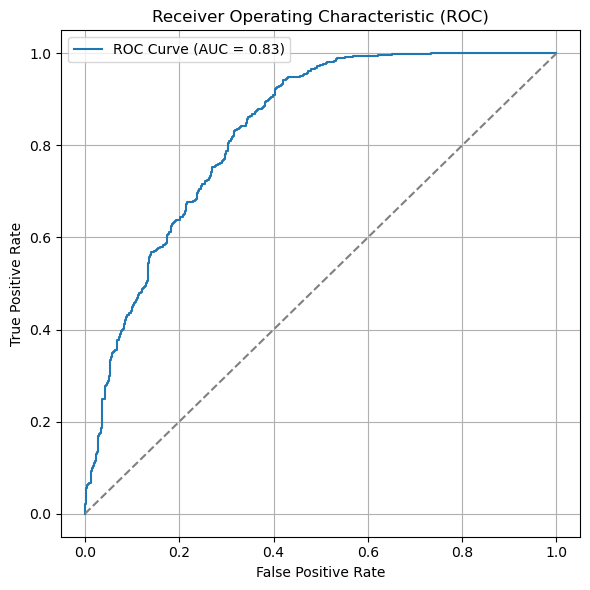

✅ Amplitude 0.4: Best Val Accuracy = 0.7600

🚀 Training on amplitude: 0.6
Epoch 1/50
32/32 - 27s - 847ms/step - accuracy: 0.5947 - loss: 0.6814 - val_accuracy: 0.6100 - val_loss: 0.6841 - learning_rate: 5.0000e-04
Epoch 2/50
32/32 - 27s - 846ms/step - accuracy: 0.6647 - loss: 0.6199 - val_accuracy: 0.6900 - val_loss: 0.6744 - learning_rate: 5.0000e-04
Epoch 3/50
32/32 - 1008s - 31s/step - accuracy: 0.7092 - loss: 0.5679 - val_accuracy: 0.7350 - val_loss: 0.6626 - learning_rate: 5.0000e-04
Epoch 4/50
32/32 - 28s - 874ms/step - accuracy: 0.7483 - loss: 0.5246 - val_accuracy: 0.7450 - val_loss: 0.6379 - learning_rate: 5.0000e-04
Epoch 5/50
32/32 - 28s - 879ms/step - accuracy: 0.7707 - loss: 0.4947 - val_accuracy: 0.7590 - val_loss: 0.6137 - learning_rate: 5.0000e-04
Epoch 6/50
32/32 - 28s - 886ms/step - accuracy: 0.7900 - loss: 0.4720 - val_accuracy: 0.7690 - val_loss: 0.5876 - learning_rate: 5.0000e-04
Epoch 7/50
32/32 - 28s - 888ms/step - accuracy: 0.8033 - loss: 0.4479 - val_accuracy: 

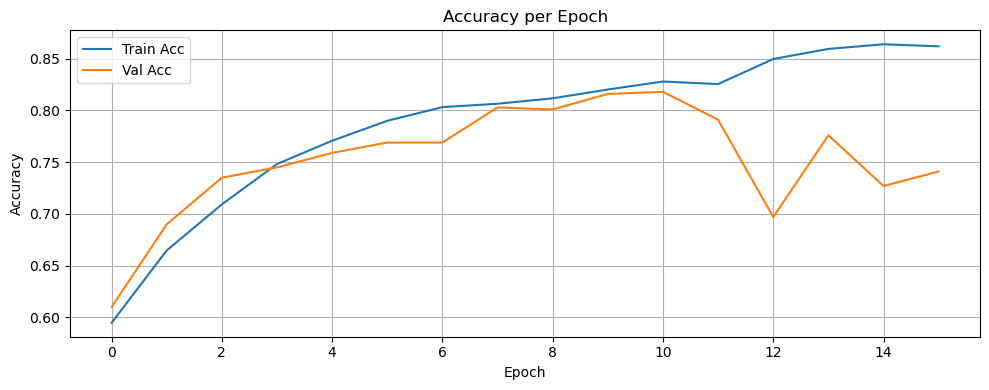

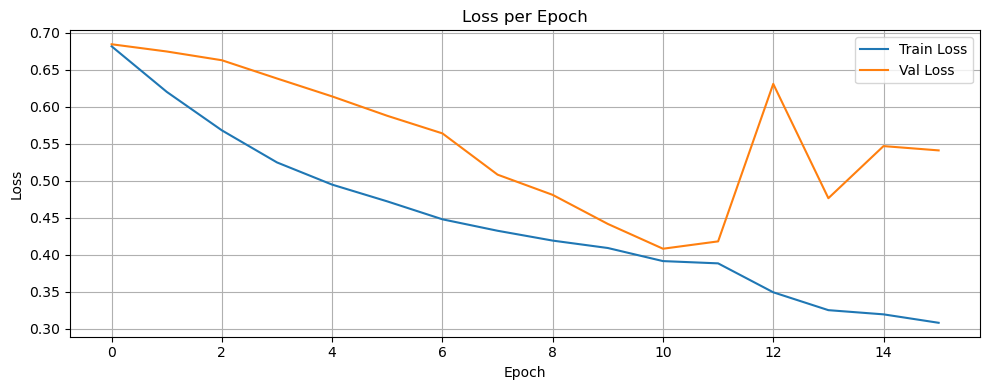

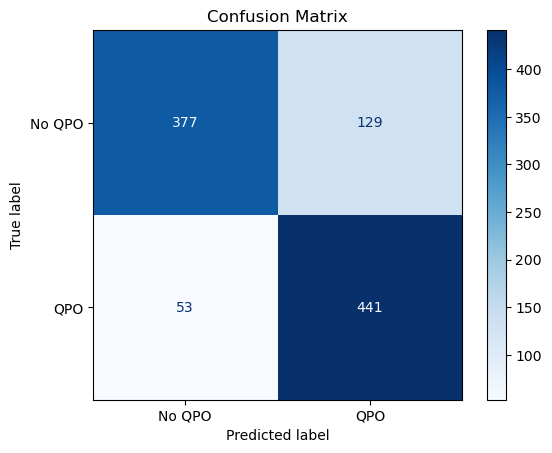

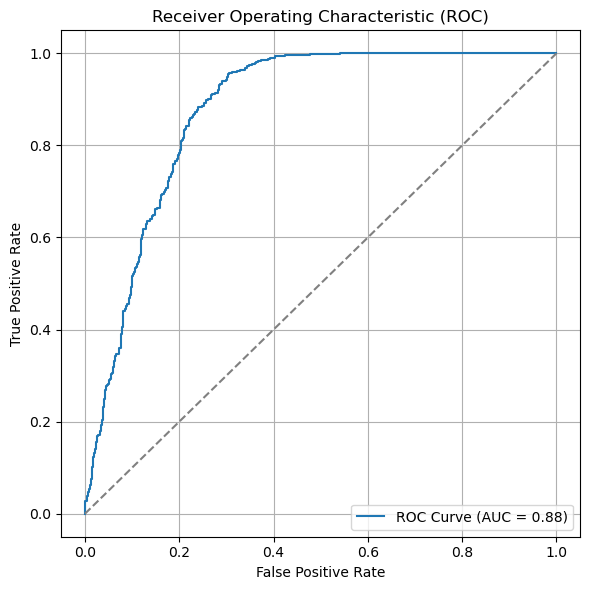

✅ Amplitude 0.6: Best Val Accuracy = 0.8180

🚀 Training on amplitude: 0.8
Epoch 1/50
32/32 - 41s - 1s/step - accuracy: 0.5720 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6853 - learning_rate: 5.0000e-04
Epoch 2/50
32/32 - 40s - 1s/step - accuracy: 0.6790 - loss: 0.5857 - val_accuracy: 0.4960 - val_loss: 0.6836 - learning_rate: 5.0000e-04
Epoch 3/50
32/32 - 41s - 1s/step - accuracy: 0.7370 - loss: 0.5293 - val_accuracy: 0.5080 - val_loss: 0.6760 - learning_rate: 5.0000e-04
Epoch 4/50
32/32 - 43s - 1s/step - accuracy: 0.7865 - loss: 0.4653 - val_accuracy: 0.5110 - val_loss: 0.6769 - learning_rate: 5.0000e-04
Epoch 5/50
32/32 - 30s - 935ms/step - accuracy: 0.8135 - loss: 0.4269 - val_accuracy: 0.5570 - val_loss: 0.6544 - learning_rate: 5.0000e-04
Epoch 6/50
32/32 - 30s - 925ms/step - accuracy: 0.8378 - loss: 0.3842 - val_accuracy: 0.6990 - val_loss: 0.5811 - learning_rate: 5.0000e-04
Epoch 7/50
32/32 - 28s - 886ms/step - accuracy: 0.8577 - loss: 0.3577 - val_accuracy: 0.7610 - val

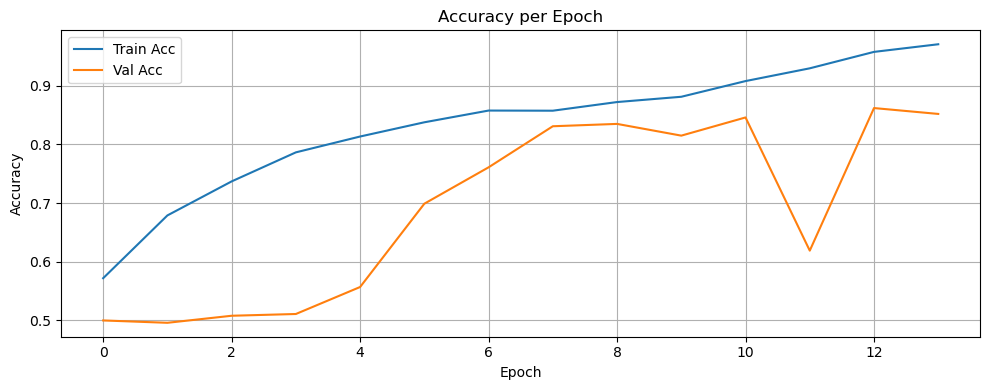

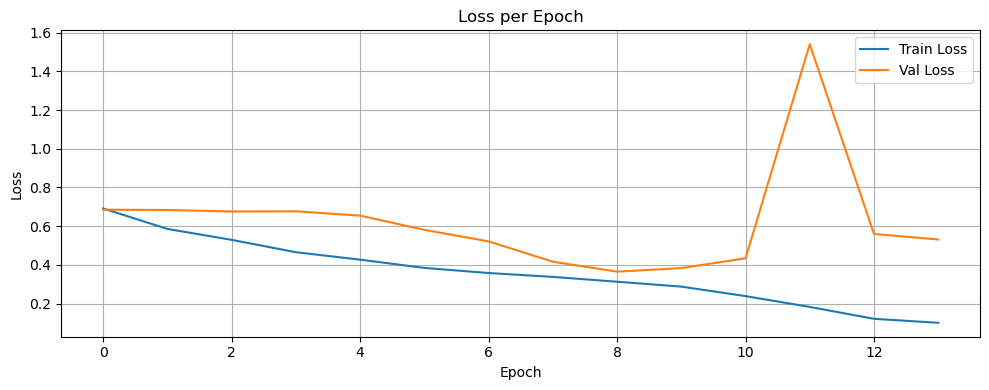

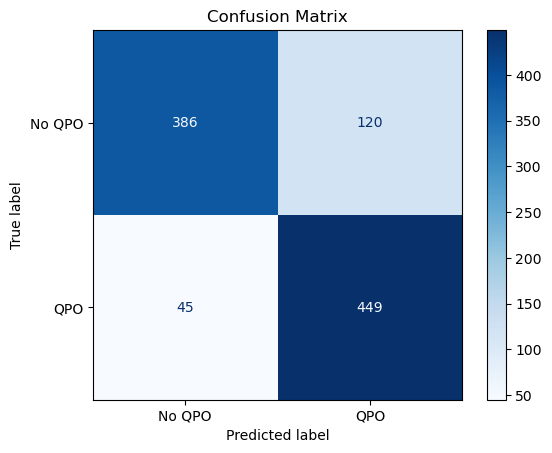

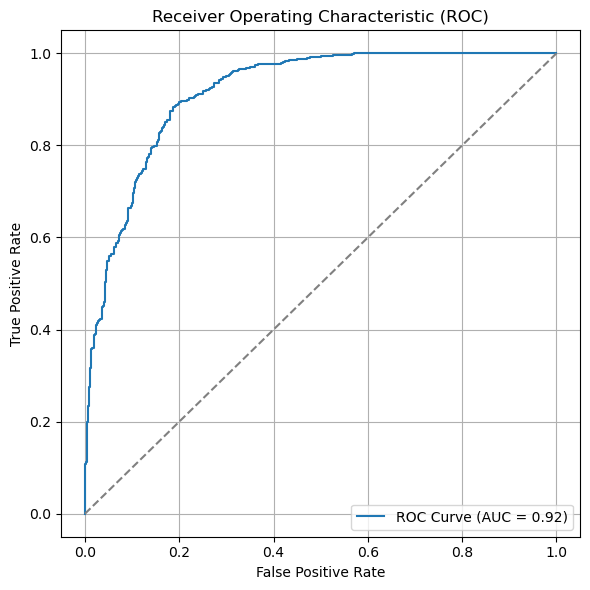

✅ Amplitude 0.8: Best Val Accuracy = 0.8620

🚀 Training on amplitude: 1.0
Epoch 1/50
32/32 - 28s - 867ms/step - accuracy: 0.6263 - loss: 0.6469 - val_accuracy: 0.7180 - val_loss: 0.6792 - learning_rate: 5.0000e-04
Epoch 2/50
32/32 - 25s - 766ms/step - accuracy: 0.7458 - loss: 0.5258 - val_accuracy: 0.7130 - val_loss: 0.6574 - learning_rate: 5.0000e-04
Epoch 3/50
32/32 - 25s - 777ms/step - accuracy: 0.8173 - loss: 0.4161 - val_accuracy: 0.5430 - val_loss: 0.6532 - learning_rate: 5.0000e-04
Epoch 4/50
32/32 - 28s - 887ms/step - accuracy: 0.8600 - loss: 0.3517 - val_accuracy: 0.4880 - val_loss: 0.8366 - learning_rate: 5.0000e-04
Epoch 5/50
32/32 - 29s - 893ms/step - accuracy: 0.8942 - loss: 0.2846 - val_accuracy: 0.4610 - val_loss: 1.4241 - learning_rate: 5.0000e-04
Epoch 6/50
32/32 - 28s - 873ms/step - accuracy: 0.9068 - loss: 0.2433 - val_accuracy: 0.4370 - val_loss: 1.7110 - learning_rate: 2.5000e-04
Epoch 7/50
32/32 - 29s - 911ms/step - accuracy: 0.9268 - loss: 0.2042 - val_accuracy: 

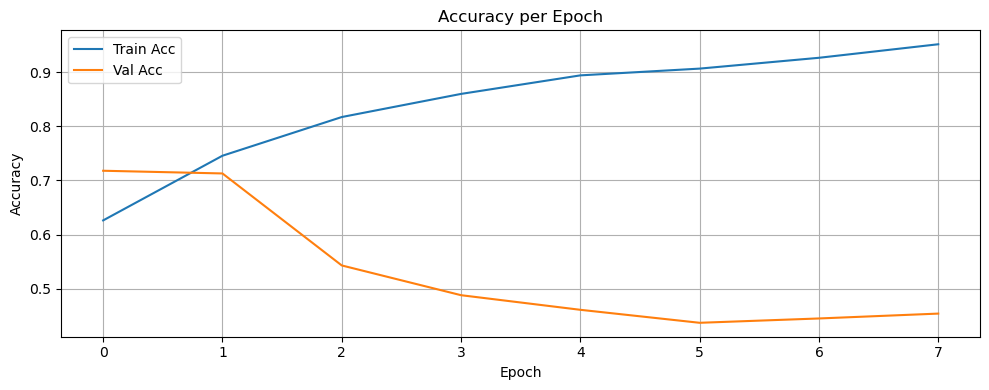

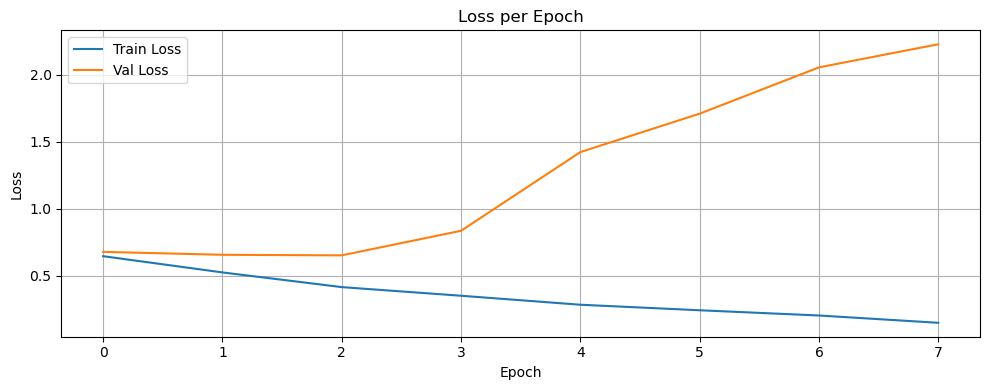

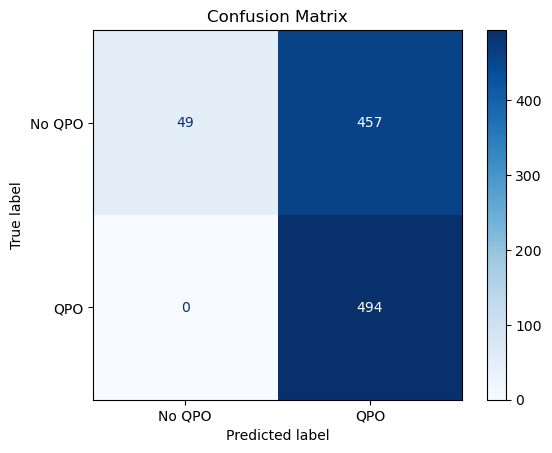

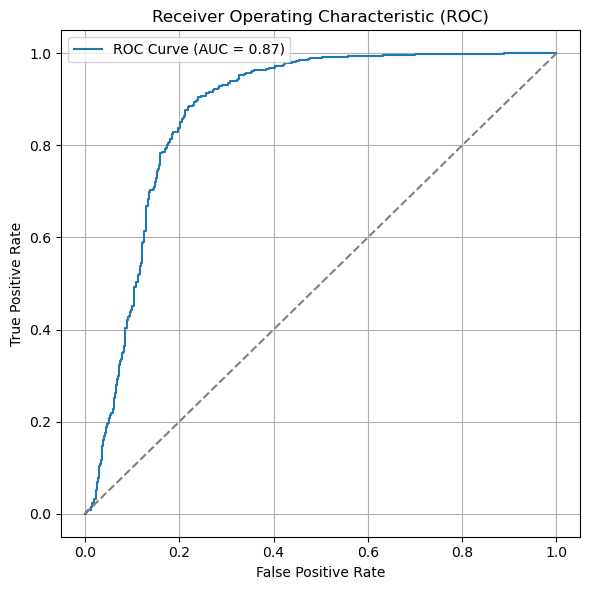

✅ Amplitude 1.0: Best Val Accuracy = 0.7180


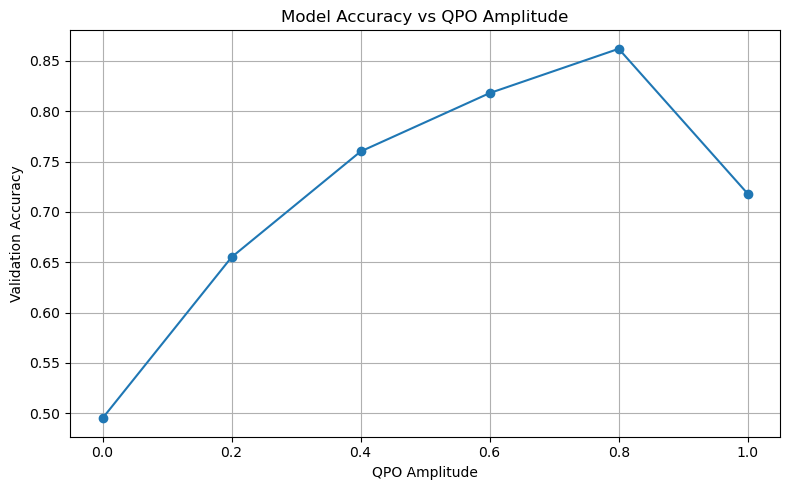

In [4]:


# --- 4. Training Loop for All Amplitudes ---
results = []
amplitudes = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

for amp in amplitudes:
    print(f"\n🚀 Training on amplitude: {amp}")
    folder = f"qpo_experiments/dataset_amp_{amp}"

    data = np.load(os.path.join(folder, 'data.npz'))
    X, y = data['X'], data['y']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model = build_model()

    early_stopping = EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=2, verbose=0)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=128,
        callbacks=[early_stopping, lr_scheduler],
        verbose=2
    )
    plot_accuracy(history=history)
    plot_loss(history=history)
    y_true, y_pred = plot_confusion_matrix(
        model=model, X_test=X_test, y_test=y_test)
    plot_roc_curve(y_true=y_true, y_pred=y_pred)

    best_val_acc = max(history.history['val_accuracy'])
    results.append((amp, best_val_acc))
    print(f"✅ Amplitude {amp}: Best Val Accuracy = {best_val_acc:.4f}")

# Save results
df_results = pd.DataFrame(results, columns=['Amplitude', 'Val_Accuracy'])
df_results.to_csv("qpo_experiments/results.csv", index=False)

# --- 5. Plot Results ---
plt.figure(figsize=(8, 5))
plt.plot(df_results['Amplitude'],
         df_results['Val_Accuracy'], marker='o', linestyle='-')
plt.xlabel("QPO Amplitude")
plt.ylabel("Validation Accuracy")
plt.title("Model Accuracy vs QPO Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()